# Trump's Tweet Analysis

## Importing the data into a Dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\arpit\\OneDrive\\Desktop\\trump_tweet.csv',encoding='unicode_escape')
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,https://t.co/hmcOfwHgAK,03-05-2020 04:16:20,12815,50277,False,1235418846758088704
1,Twitter for iPhone,https://t.co/DlGXOvEjVq,03-05-2020 04:03:48,9415,34519,False,1235415690292662273
2,Twitter for iPhone,I will be interviewed by @seanhannity on @FoxN...,03-05-2020 02:03:37,7191,43862,False,1235385447813197831
3,Twitter for iPhone,RT @realDonaldTrump: Will be interviewed by @S...,03-05-2020 02:00:41,9330,0,True,1235384709296816128
4,Twitter for iPhone,Retired Four Star General Jack Keane will rece...,03-05-2020 01:23:29,15217,83143,False,1235375346494644224


## Choosing the relevant columns

In [3]:
df.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')

In [4]:
#adding an year column
df['created_at_year']=[i.split()[0][-4:] for i in df.created_at]

In [5]:
df=df[['created_at_year','text','retweet_count']]

In [6]:
df.head()

,created_at_year,text,retweet_count
0,2020,https://t.co/hmcOfwHgAK,12815
1,2020,https://t.co/DlGXOvEjVq,9415
2,2020,I will be interviewed by @seanhannity on @FoxN...,7191
3,2020,RT @realDonaldTrump: Will be interviewed by @S...,9330
4,2020,Retired Four Star General Jack Keane will rece...,15217


## Number of tweets per year

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of tweets')

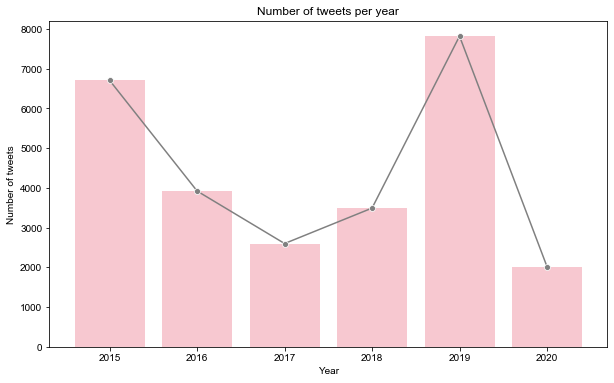

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.created_at_year.value_counts().index,
             y=df.created_at_year.value_counts().values,
             color='pink')
sns.lineplot(x=df.created_at_year.value_counts().index,
             y=df.created_at_year.value_counts().values,marker='o',
             color='grey')
sns.set_style('whitegrid')
plt.title('Number of tweets per year')
plt.xlabel('Year')
plt.ylabel('Number of tweets')

This line chart tells us that President Trump's tweet count started to decline till 2017 (when he was elected). The rise is in the number of tweets is extreme from 2018 to 2019, 2019 being the year he was most active on twitter. He has already tweeted about 2000 times since the beginning of 2020 and it's already march.

## Yearwise Analysis

In [9]:
from string import punctuation
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#creating an year list and sorting it
yearlist=list(df.created_at_year.value_counts().index)
yearlist.sort()

#Creating empty dictionaries to add handles,words, tweetstrings and polarity year wise
allhandles,allwords,alltweetstrings,allpolarity=[{} for i in range(4)]

for y in yearlist: # Considering one year at a time
    tweetstring=''
    tweetlist,hashtags,handles=[[] for i in range(3)]
    for i in df[df['created_at_year']==y].index:
        tweetstring = tweetstring + ' ' + df.loc[i, 'text']
        tweetlist.append(df.loc[i, 'text'])
    
    #Cleaning the strings
    #Removing urls
    tstr = re.sub(r'http\S+', ' ', tweetstring.strip(punctuation).lower())
    #Removing : and ,
    tstr = tstr.replace(':','').replace('.','')
    #Creating a list from cleaned text
    words = tstr.split()
    
    #adding to dictionaries with years as keys
    allwords[y]=words
    alltweetstrings[y]=tstr
    
    #Extracting handles and adding to dictionary
    handles=[]
    for w in words:
        if re.search(r'^@\w+', w):
            handles.append(w)
    allhandles[y]=handles
    
    #Finding polarity of tweets
    sentiment = {}
    polarity = [0]*len(tweetlist)
    len(polarity)
    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
    
    #Adding polarity to a dictionary
    allpolarity[y]=polarity
allpolarity['2015'][:5]

[0.9559, -0.4939, 0.7814, 0.8261, -0.5267]

In [10]:
#Adding a 'polarity' column in the dataframe
df['polarity']=0
pol=[]
for i in range(len(list(allpolarity.values()))):
    pol+=list(allpolarity.values())[i]
df['polarity']=pol

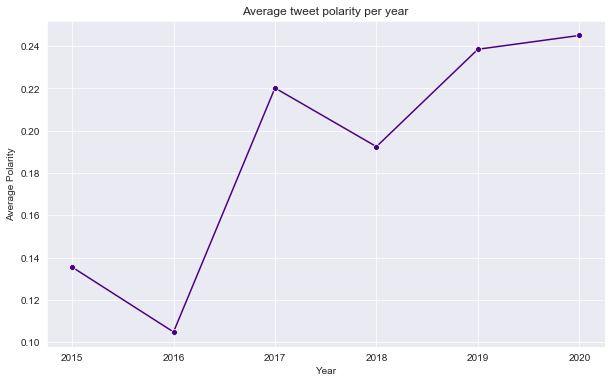

In [19]:
# Taking mean polarities of each year and plotting a line chart to show the trend
plt.figure(figsize=(10,6))
sns.lineplot(x=df[['created_at_year','polarity']].groupby('created_at_year').mean().index,
             y=df[['created_at_year','polarity']].groupby('created_at_year').mean()['polarity'],marker='o',
             color='indigo')
sns.set_style('darkgrid')
plt.title('Average tweet polarity per year')
plt.xlabel('Year')
plt.ylabel('Average Polarity')
plt.show()

It's fascinating that the mean tweet polarity has been increasing every year since he took his oath as the president of the United States of America. It'd be exciting to see what the average tweet polarity looks like at the end of 2020.

## Analyzing top 5 most mentioned twitter handles

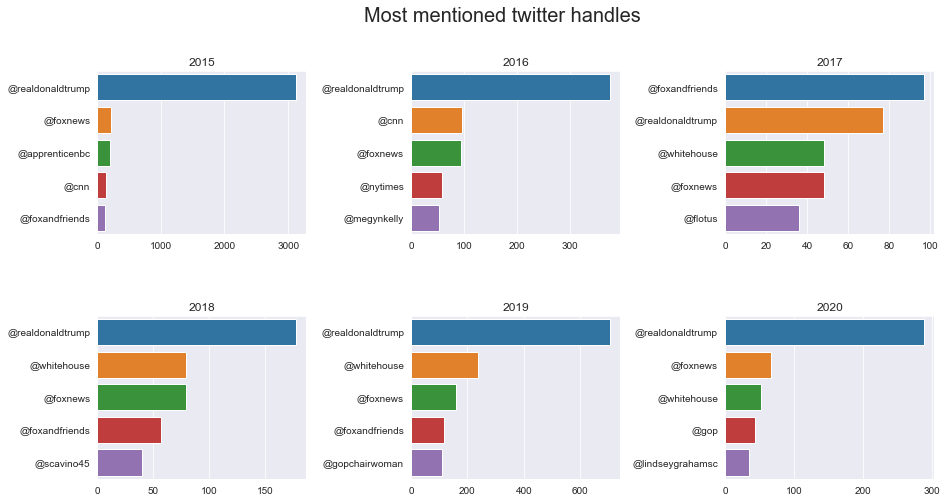

In [12]:
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust(
    wspace  =  0.5, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most mentioned twitter handles", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(allhandles['2015']).value_counts()[:5],
            y=pd.Series(allhandles['2015']).value_counts()[:5].index, ax=ax[0][0])
sns.barplot(x=pd.Series(allhandles['2016']).value_counts()[:5],
            y=pd.Series(allhandles['2016']).value_counts()[:5].index, ax=ax[0][1])
sns.barplot(x=pd.Series(allhandles['2017']).value_counts()[:5],
            y=pd.Series(allhandles['2017']).value_counts()[:5].index, ax=ax[0][2])
sns.barplot(x=pd.Series(allhandles['2018']).value_counts()[:5],
            y=pd.Series(allhandles['2018']).value_counts()[:5].index, ax=ax[1][0])
sns.barplot(x=pd.Series(allhandles['2019']).value_counts()[:5],
            y=pd.Series(allhandles['2019']).value_counts()[:5].index, ax=ax[1][1])
sns.barplot(x=pd.Series(allhandles['2020']).value_counts()[:5],
            y=pd.Series(allhandles['2020']).value_counts()[:5].index, ax=ax[1][2])

plt.show()

## Analysing frequently tweeted words

In [14]:
#tokenize
import nltk.tokenize
stop_words = nltk.corpus.stopwords.words('english')
token,tokenl={},[]
for y in yearlist:
    tweetstring=''
    for i in df[df['created_at_year']==y].index:
        tweetstring = tweetstring + ' ' + df.loc[i, 'text']
    #Cleaning the strings
    #Removing urls
    tstr = re.sub(r'http\S+', ' ', tweetstring.strip(punctuation).lower())
    #Removing punctuation and special characters
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t':
        tstr = tstr.replace(char, ' ')
    #tokenizing and removing stopwords
    tokenl=[w for w in nltk.tokenize.word_tokenize(tstr) if w not in stop_words]
    #Removing words with less than 2 characters
    #Also removing the word amp because it holds no meaning for us
    tokenl=[w for w in tokenl if len(w)>2 and w!='amp']
    token[y]=tokenl

In [15]:
nltk.download('wordnet')
nltk.download('universal_tagset')
lemmatized,unipos,noun,adjective=[{} for i in range(4)]
porter,lancaster,snowball = nltk.stem.PorterStemmer(),nltk.stem.LancasterStemmer(),nltk.stem.SnowballStemmer('english')
for key in token:
    x=token[key]
    #stemming
    pstemmed=[porter.stem(w) for w in x]
    lstemmed = [lancaster.stem(w) for w in x ]
    sstemmed = [snowball.stem(w) for w in x]
    print(key)
    print('porter stemmer total:',len(pstemmed),' root:',len(list(set(pstemmed))))
    print('lancaster stemmer total:',len(lstemmed),' root:',len(list(set(lstemmed))))
    print('snowball stemmer total:',len(sstemmed),' root:',len(list(set(sstemmed))))
    
    #lemmatizing
    wordnet = nltk.stem.WordNetLemmatizer()
    lemm = [wordnet.lemmatize(w) for w in x]
    print('wordnet lemmatizer total:',len(lemm),' root:',len(list(set(lemm))),'\n')
    
    #Parts of Speech Classification
    #after checking for misclassifications using parts of speech tagging, I found that universal tagset works better.
    uni_pos = nltk.pos_tag(lemm, tagset='universal')
    
    #Create seperate lists for nouns and adjectives
    word, pos = zip(*uni_pos)
    n,a=[],[]
    for i, w in enumerate(word):
        if pos[i] == 'NOUN':
           n.append(word[i])
        elif pos[i] == 'ADJ':
           a.append(word[i])
    
    lemmatized[key]=lemm
    unipos[key]=uni_pos
    noun[key]=n
    adjective[key]=a
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


2015
porter stemmer total: 77204  root: 12814
lancaster stemmer total: 77204  root: 12130
snowball stemmer total: 77204  root: 12760
wordnet lemmatizer total: 77204  root: 14021 

2016
porter stemmer total: 42518  root: 6397
lancaster stemmer total: 42518  root: 5893
snowball stemmer total: 42518  root: 6357
wordnet lemmatizer total: 42518  root: 7317 

2017
porter stemmer total: 30064  root: 4465
lancaster stemmer total: 30064  root: 4021
snowball stemmer total: 30064  root: 4425
wordnet lemmatizer total: 30064  root: 5333 

2018
porter stemmer total: 60878  root: 6561
lancaster stemmer total: 60878  root: 5884
snowball stemmer total: 60878  root: 6493
wordnet lemmatizer total: 60878  root: 7877 

2019
porter stemmer total: 108064  root: 9806
lancaster stemmer total: 108064  root: 8695
snowball stemmer total: 108064  root: 9716
wordnet lemmatizer total: 108064  root: 11921 

2020
porter stemmer total: 24104  root: 4488
lancaster stemmer total: 24104  root: 4042
snowball stemmer total:

It is evident that porter is the harshest of them all. If I had to choose a stemmer I'd choose lancaster because it is the least aggresive. In this case, wordnet lemmatizer is the best option.

After trying parts of speech tagging, I found that universal tagset works better in this case and hence went ahead with it.

Now we have lists of words, nouns and adjectives for all the years from 2015 to 2020

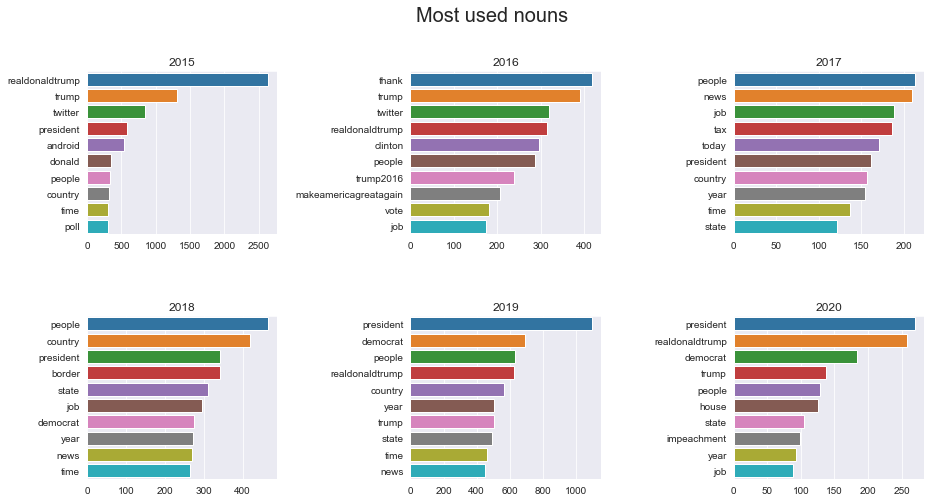

In [16]:
#Plot for nouns
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust(
    wspace  =  0.7, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most used nouns", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(noun['2015']).value_counts()[:10],
            y=pd.Series(noun['2015']).value_counts()[:10].index, ax=ax[0][0])
sns.barplot(x=pd.Series(noun['2016']).value_counts()[:10],
            y=pd.Series(noun['2016']).value_counts()[:10].index, ax=ax[0][1])
sns.barplot(x=pd.Series(noun['2017']).value_counts()[:10],
            y=pd.Series(noun['2017']).value_counts()[:10].index, ax=ax[0][2])
sns.barplot(x=pd.Series(noun['2018']).value_counts()[:10],
            y=pd.Series(noun['2018']).value_counts()[:10].index, ax=ax[1][0])
sns.barplot(x=pd.Series(noun['2019']).value_counts()[:10],
            y=pd.Series(noun['2019']).value_counts()[:10].index, ax=ax[1][1])
sns.barplot(x=pd.Series(noun['2020']).value_counts()[:10],
            y=pd.Series(noun['2020']).value_counts()[:10].index, ax=ax[1][2])

plt.show()

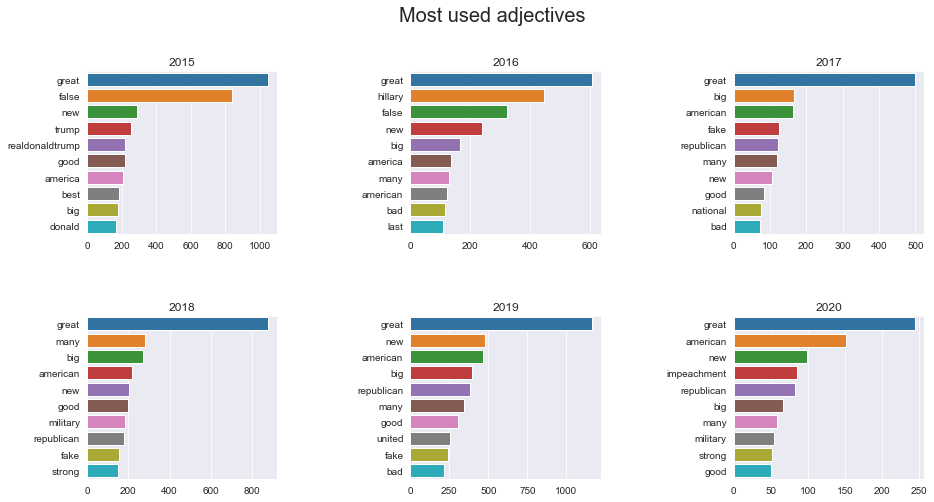

In [17]:
#Plot for adjectives
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust( 
    wspace  =  0.7, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most used adjectives", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(adjective['2015']).value_counts()[:10],
            y=pd.Series(adjective['2015']).value_counts()[:10].index, ax=ax[0][0])
sns.barplot(x=pd.Series(adjective['2016']).value_counts()[:10],
            y=pd.Series(adjective['2016']).value_counts()[:10].index, ax=ax[0][1])
sns.barplot(x=pd.Series(adjective['2017']).value_counts()[:10],
            y=pd.Series(adjective['2017']).value_counts()[:10].index, ax=ax[0][2])
sns.barplot(x=pd.Series(adjective['2018']).value_counts()[:10],
            y=pd.Series(adjective['2018']).value_counts()[:10].index, ax=ax[1][0])
sns.barplot(x=pd.Series(adjective['2019']).value_counts()[:10],
            y=pd.Series(adjective['2019']).value_counts()[:10].index, ax=ax[1][1])
sns.barplot(x=pd.Series(adjective['2020']).value_counts()[:10],
            y=pd.Series(adjective['2020']).value_counts()[:10].index, ax=ax[1][2])

plt.show()

It's not a surprise. The adjective that President trump uses the most is 'Great'.

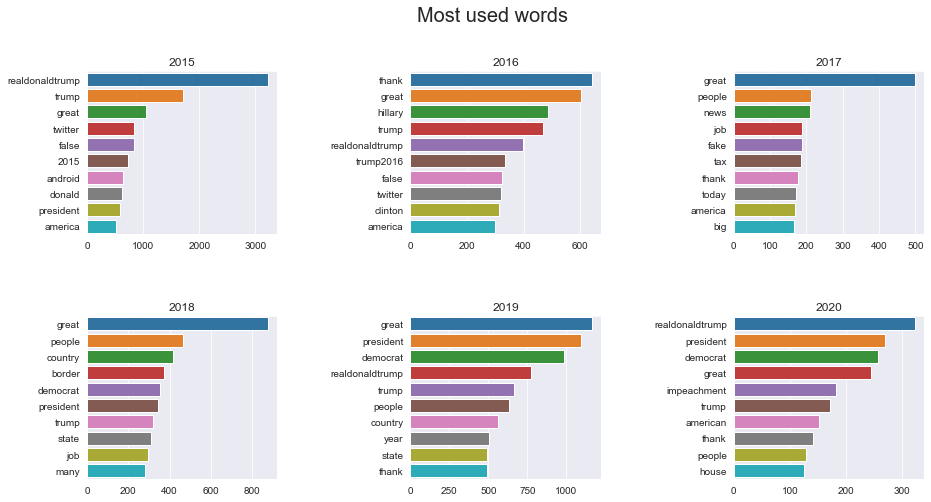

In [18]:
#Plot for most used words
fig, ax = plt.subplots(figsize=(15,7.5), ncols=3, nrows=2)
plt.subplots_adjust( 
    wspace  =  0.7, 
    hspace  =  0.5
)
y_title_margin = 1.0

plt.suptitle("Most used words", y = 1.0, fontsize=20)

ax[0][0].set_title("2015",y = y_title_margin)
ax[0][1].set_title("2016",y = y_title_margin)
ax[0][2].set_title("2017",y = y_title_margin)
ax[1][0].set_title("2018",y = y_title_margin)
ax[1][1].set_title("2019",y = y_title_margin)
ax[1][2].set_title("2020",y=y_title_margin)

sns.barplot(x=pd.Series(lemmatized['2015']).value_counts()[:10],
            y=pd.Series(lemmatized['2015']).value_counts()[:10].index, ax=ax[0][0])
sns.barplot(x=pd.Series(lemmatized['2016']).value_counts()[:10],
            y=pd.Series(lemmatized['2016']).value_counts()[:10].index, ax=ax[0][1])
sns.barplot(x=pd.Series(lemmatized['2017']).value_counts()[:10],
            y=pd.Series(lemmatized['2017']).value_counts()[:10].index, ax=ax[0][2])
sns.barplot(x=pd.Series(lemmatized['2018']).value_counts()[:10],
            y=pd.Series(lemmatized['2018']).value_counts()[:10].index, ax=ax[1][0])
sns.barplot(x=pd.Series(lemmatized['2019']).value_counts()[:10],
            y=pd.Series(lemmatized['2019']).value_counts()[:10].index, ax=ax[1][1])
sns.barplot(x=pd.Series(lemmatized['2020']).value_counts()[:10],
            y=pd.Series(lemmatized['2020']).value_counts()[:10].index, ax=ax[1][2])

plt.show()

### That's all folks